In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('age-of-electoral-democracy-lexical.csv')

In [3]:
df = df.rename(columns={
    'Entity': 'Country',
    'Age of electoral democracy': 'Age'
})

In [4]:
df = df.drop(columns=['Code'])

In [5]:
df.dtypes

Country    object
Year        int64
Age        object
dtype: object

In [6]:
df_brazil = df.loc[df['Country'] == "Brazil"].reset_index(drop=True)

In [7]:
df_brazil['Status'] = df_brazil['Age']

In [8]:
replacable_ages = [
    'non-electoral autocracy',
    'multi-party autocracy without elected executive',
    'one-party autocracy',
    'multi-party autocracy',
    'exclusive democracy'
]

for age in replacable_ages:
    df_brazil['Age'] = df_brazil['Age'].replace(age, 0)

In [9]:
numerical_statuses = [str(n) for n in range(1, 41)]

for status in numerical_statuses:
    df_brazil['Status'] = df_brazil['Status'].replace(status, 'electoral democracy')

In [10]:
df_brazil.dtypes

Country    object
Year        int64
Age        object
Status     object
dtype: object

In [11]:
df_brazil['Age'] = df_brazil['Age'].astype(int)

In [12]:
df_brazil.dtypes

Country    object
Year        int64
Age         int64
Status     object
dtype: object

In [13]:
all_types_government = df_brazil.groupby('Status').size().values.sum()

In [14]:
autoritharian_types = [
    'non-electoral autocracy',
    'multi-party autocracy without elected executive',
    'one-party autocracy',
    'multi-party autocracy'
]
autoritharian_governments = df_brazil.loc[df_brazil['Status'].isin(autoritharian_types)].groupby('Status').size().values.sum() / (all_types_government * 1.0)

In [15]:
democratic_types = [
    'electoral democracy',
    'exclusive democracy',
]
democratic_governments = df_brazil.loc[df_brazil['Status'].isin(democratic_types)].groupby('Status').size().values.sum() / (all_types_government * 1.0)

In [16]:
governments1 = [autoritharian_governments, democratic_governments]

In [17]:
democratic_governments2 = df_brazil.loc[df_brazil['Status'].isin(democratic_types)].groupby('Status').size().values.sum()
electoral_democratic_governments = df_brazil.loc[df_brazil['Status'] == "electoral democracy"].groupby('Status').size().values.sum() / (democratic_governments2 * 100.0)
exclusive_democratic_governments = df_brazil.loc[df_brazil['Status'] == "exclusive democracy"].groupby('Status').size().values.sum() / (democratic_governments2 * 100.0)
governments2 = [electoral_democratic_governments, exclusive_democratic_governments]

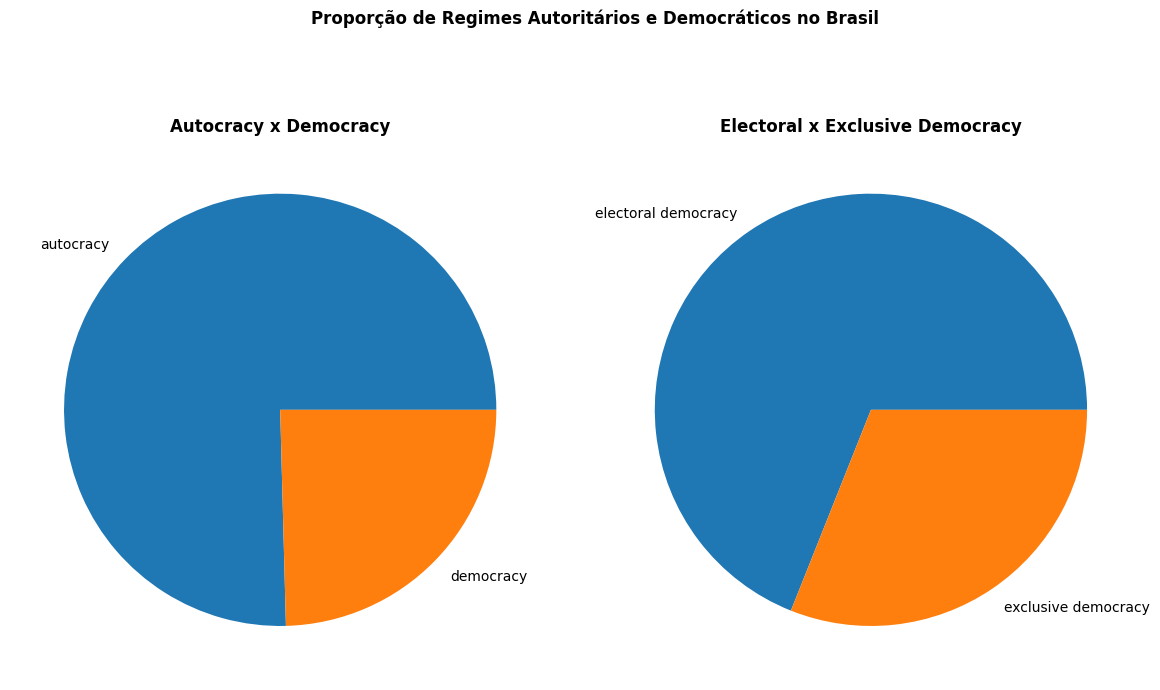

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

labels1=['autocracy', 'democracy']
labels2=['electoral democracy', 'exclusive democracy']

ax[0].pie(governments1, labels=labels1)
ax[1].pie(governments2, labels=labels2)

plt.suptitle('Proporção de Regimes Autoritários e Democráticos no Brasil', fontweight='bold')
ax[0].set_title("Autocracy x Democracy", fontweight='bold')
ax[1].set_title("Electoral x Exclusive Democracy", fontweight='bold')
plt.tight_layout()
plt.show()